In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

In [2]:
df= pd.read_csv("train.csv")
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [4]:
print(df.columns)  # See all column names


Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')


In [5]:
df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

Data Preprocessing 

1. filling the missing values

In [6]:
def fillmissing(df):

    df['Brand']=df['Brand'].fillna(df['Brand'].mode()[0])

    df['Material']=df['Material'].fillna(df['Material'].mode()[0])

    df['Size'] = df.groupby(['Brand', 'Material'])['Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Medium"))
    #size correlating with brand and material , filling it based on the most common size for that brand/material.

    df['Laptop Compartment']=df['Laptop Compartment'].fillna(df['Laptop Compartment'].mode()[0])
    df['Waterproof'] = df.groupby('Material')['Waterproof'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "No"))
    #fill based on the most common waterproof value per material.

    df['Style'] = df.groupby(['Brand', 'Material'])['Style'].transform(lambda x: x.fillna(x.mode()[0]))
    #using group based filling with brand and material

    df['Color'] = df.groupby('Brand')['Color'].transform(lambda x: x.fillna(x.mode()[0]))
    #filling with most common colour per brand

    df['Weight Capacity (kg)']=df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].mean())
    return df

In [7]:
df=fillmissing(df)
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [8]:
df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

2. Labeling the values in columns

In [9]:
brand_mapping= {'Jansport':0, 'Under Armour':1, 'Nike':2, 'Adidas':3, 'Puma':4}
material_mapping={'Leather':0, 'Canvas':1, 'Nylon':2, 'Polyester':3}
size_mapping={'Medium':0, 'Small':1, 'Large':2}
style_mapping={'Tote':0, 'Messenger':1, 'Backpack':2}
color_mapping={'Black':0, 'Green':1, 'Red':2, 'Blue':3, 'Gray':4, 'Pink':5}


def labelcols(df):
	df['Brand']=df['Brand'].map(brand_mapping)
	df['Material']=df['Material'].map(material_mapping)
	df['Size']=df['Size'].map(size_mapping)
	df['Laptop Compartment']=df['Laptop Compartment'].map({'Yes':1,'No':0})
	df['Waterproof']=df['Waterproof'].map({'Yes':1,'No':0})
	df['Style']=df['Style'].map(style_mapping)
	df['Color']=df['Color'].map(color_mapping)
	return df

In [10]:
df= labelcols(df)
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,0,7.0,1,0,0,0,11.611723,112.15875
1,1,0,1,1,10.0,1,1,1,1,27.078537,68.88056
2,2,1,0,1,2.0,1,0,1,2,16.643760,39.17320
3,3,2,2,1,8.0,1,0,1,1,12.937220,80.60793
4,4,3,1,0,1.0,1,1,1,1,17.749338,86.02312


In [11]:
X=df.drop(columns=['id','Price'])
y=df['Price']

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)



(240000, 9)
(60000, 9)


In [ ]:
'''
R² Score (R-Squared) → "How well does my model explain variance?"
Best value = 1 (perfect prediction)
Worst value = 0 or negative (bad fit)
Higher is better
Similar to accuracy in regression

Mean Absolute Error (MAE) → "How far off are my predictions, on average?"
Measures the average absolute difference between predicted and actual values.
Lower is better

Mean Squared Error (MSE) → "How much are my errors squared?"
Squares the error values so that larger errors have more impact.
Lower is better

Root Mean Squared Error (RMSE) → "Average error in the same unit as price."
Just the square root of MSE (more interpretable).
Lower is better
'''

In [12]:
from sklearn.tree import DecisionTreeRegressor

dt_model= DecisionTreeRegressor(max_depth=5, min_samples_split=5,min_samples_leaf=5, random_state=42)
dt_model.fit(X_train,y_train)

y_pred_dt= dt_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2 Score:", r2_score(y_test, y_pred_dt))


MAE: 33.6610419306303
MSE: 1515.9953154153968
RMSE: 38.93578451008014
R2 Score: 0.0004092233450759819


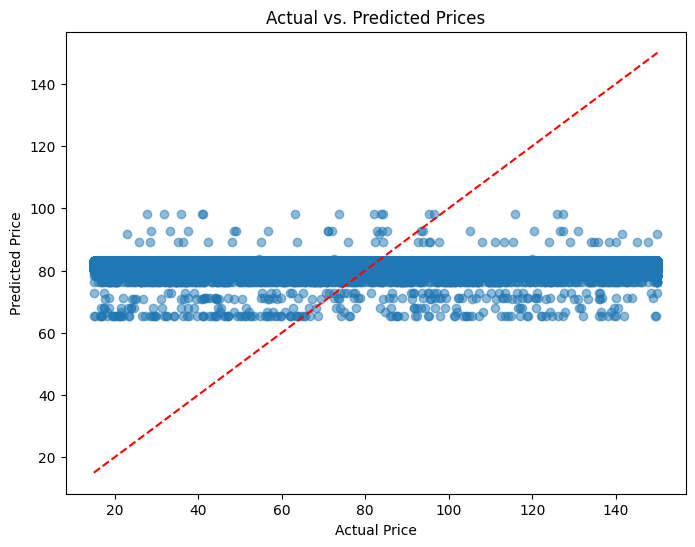

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(
    n_estimators=500, 
    max_depth=8, 
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train,y_train)

y_pred_rf= rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:",np.sqrt( mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

MAE: 33.647772576682996
MSE: 1514.8775508123708
RMSE: 38.92142791332778
R2 Score: 0.0011462356407571095


In [24]:
df_test=pd.read_csv("test.csv")
df_test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [27]:
df_test.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64

In [26]:
df_test=fillmissing(df_test)
df_test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,Adidas,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [28]:
df_test=labelcols(df_test)
df_test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,4,0,1,2.0,0,0,0,1,20.671147
1,300001,2,1,0,7.0,0,1,2,1,13.564105
2,300002,3,1,2,9.0,0,1,1,3,11.809799
3,300003,3,2,2,1.0,1,0,1,1,18.477036
4,300004,3,2,2,2.0,1,1,0,0,9.907953


In [29]:
X_test_final=df_test.drop(columns=['id'])

y_pred_test= rf.predict(X_test_final)

In [33]:
y_pred_test.shape

(200000,)

In [32]:
submission = pd.DataFrame({
    'id': df_test['id'],  
    'Price': np.round(y_pred_test, 3)   
})

submission.to_csv("submission_nupur.csv", index=False)

print("Submission file created successfully!")

Submission file created successfully!
